In [ ]:
import sys
import numpy as np
import sounddevice as sd



sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import continuous_time_plot, discrete_time_plot
from scipy.io import wavfile
from matplotlib import pyplot as plt



# Path to the .wav files
audio_A1 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound1.wav"
audio_SH = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound2.wav"
audio_MM = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound3.wav"
audio_A2 = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound4.wav"
audio_TAP = "/Users/carlosedm10/projects/college/TDS/P1/Practicas_Practica1_sound5.wav"

audios = [audio_A1, audio_SH, audio_MM, audio_A2, audio_TAP]


# Exercise 1

In [ ]:

for audio in audios:
    freq, audio_data = wavfile.read(audio)
    time_vector = np.arange(len(audio_data)) / freq
    audio_data = audio_data / 2 ** 15
    # Plot the audio data
    continuous_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        linewidth=0.5,
    )
    discrete_time_plot(
        time_vector,
        audio_data,
        variable_name=audio.split("/")[-1].split(".")[0],
        xlabel="Time (s)",
        markersize=2,
        linewidth=0.5,
    )
    # Play the audio
    sd.play(audio_data, freq)

    # Wait for the audio to finish playing
    sd.wait()

# Exercise 2

In [ ]:
muestras_audio= (15000, 14000, 1500, 18000,12300)
for i in range(len(audios)):
    freq, y = wavfile.read(audios[i])
    y = y / 2 ** 15
    time_scale= int(freq * 0.1)
    time_vector= np.arange(time_scale) / 1000 # time in ms
    audio_100ms = y[muestras_audio[i]:muestras_audio[i]+time_scale]
    continuous_time_plot(time_vector,audio_100ms, variable_name="Audio 100ms", xlabel="Time (s)")

    # Make a fast discrete fourier frecuency plot
    N = len(audio_100ms)
    Y = np.fft.fft(audio_100ms)
    Y = np.abs(Y) / N
    f = np.fft.fftfreq(N, 1 / freq)
    
    discrete_time_plot(f, Y, variable_name="Audio 100ms", xlabel="Frequency (Hz)")

    # Now we will print the maximum frecuency of each plot for getting the fundamental frecuency
    max_frec = np.max(Y)
    index = np.where(Y == max_frec)
    print(f"Fundamental Frequency: {abs(f[index][0])} Hz")
    print(f"Fundamental Period: {round(1/abs(f[index][0]),3)} s")


    # Now we will calculate the power for each signal
    power = (y ** 2).mean()
    print(f"Power: {round(power,3)} W")
    print(f"Power in dB: {round(10 * np.log10(power),3)} dB")

    # Now we will calculate the energy for each signal
    energy = np.sum(y ** 2)
    print(f"Energy: {round(energy,3)} J")
    print(f"Energy in dB: {round(10 * np.log10(energy),3)} dB")




# Exercise 3

Frame length: 1600 samples


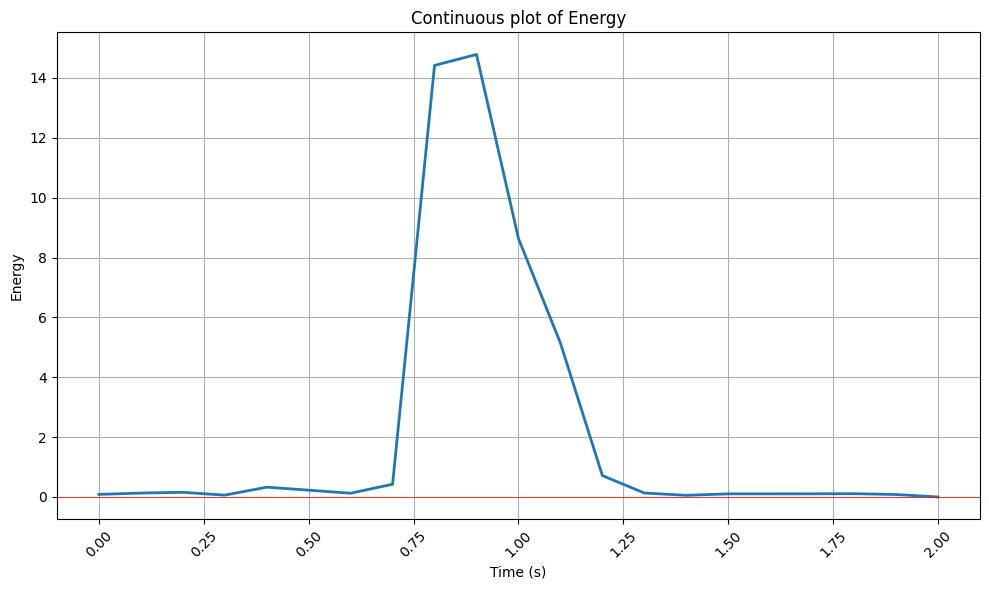

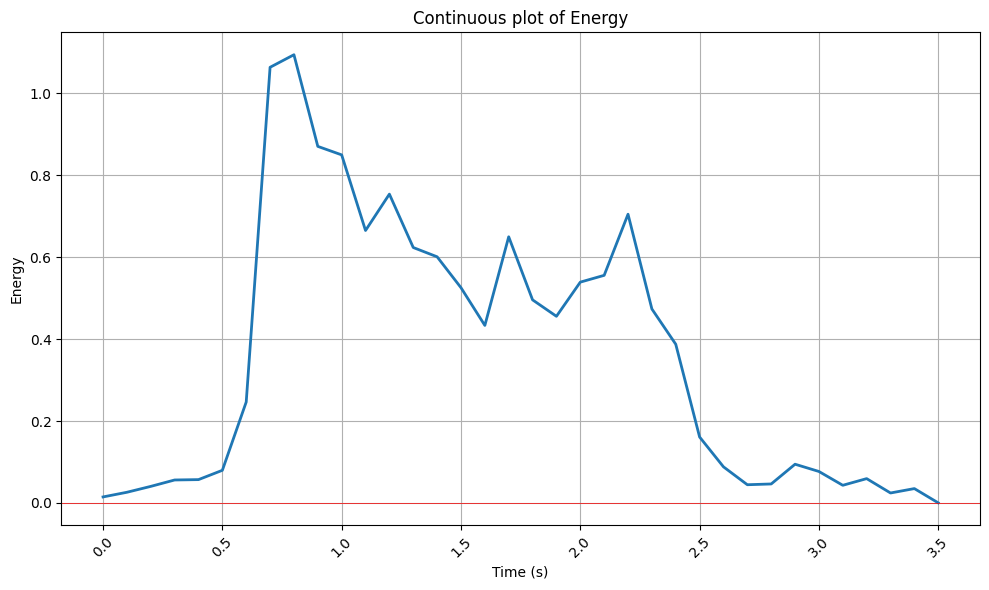

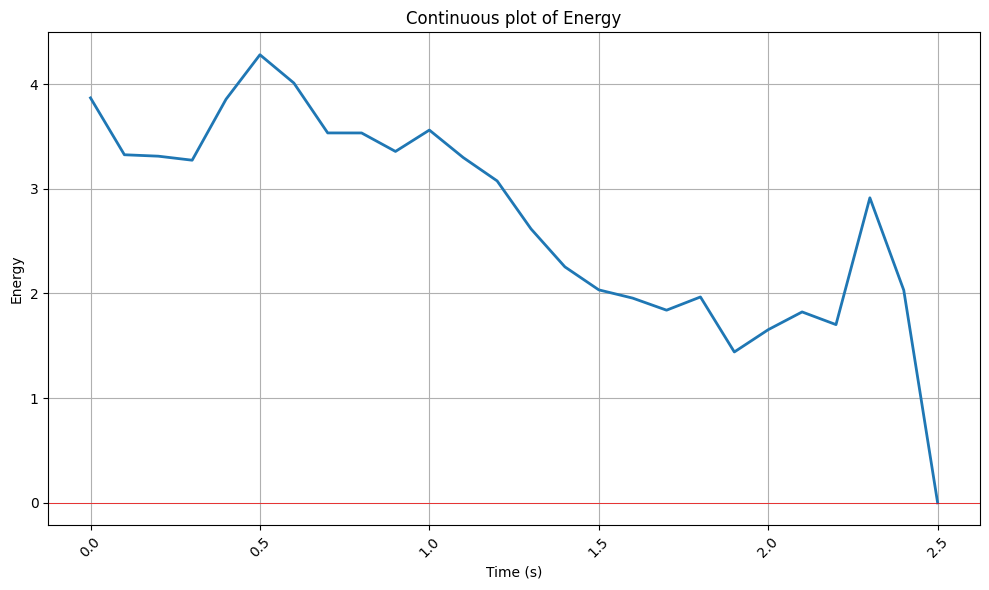

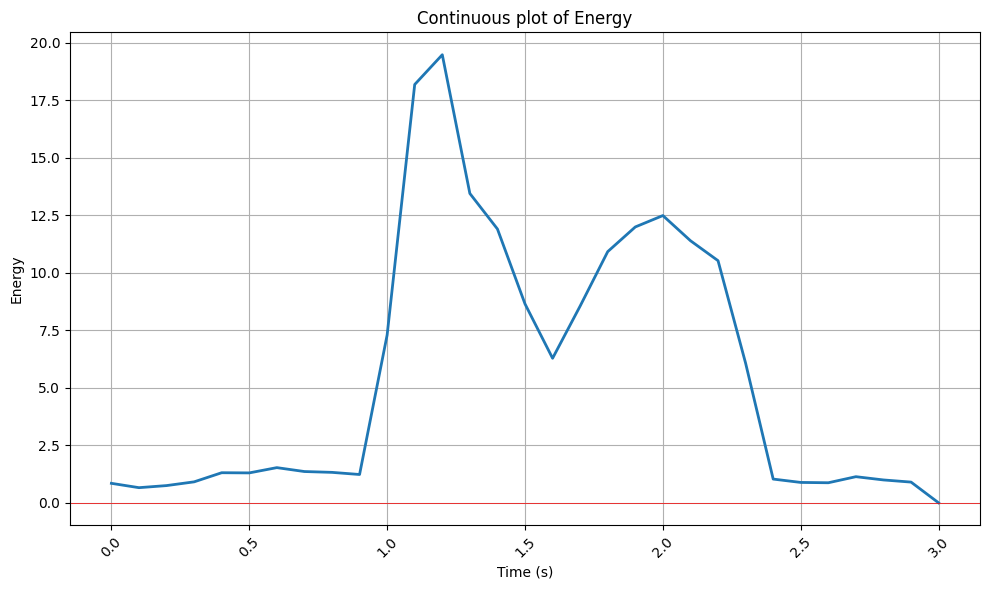

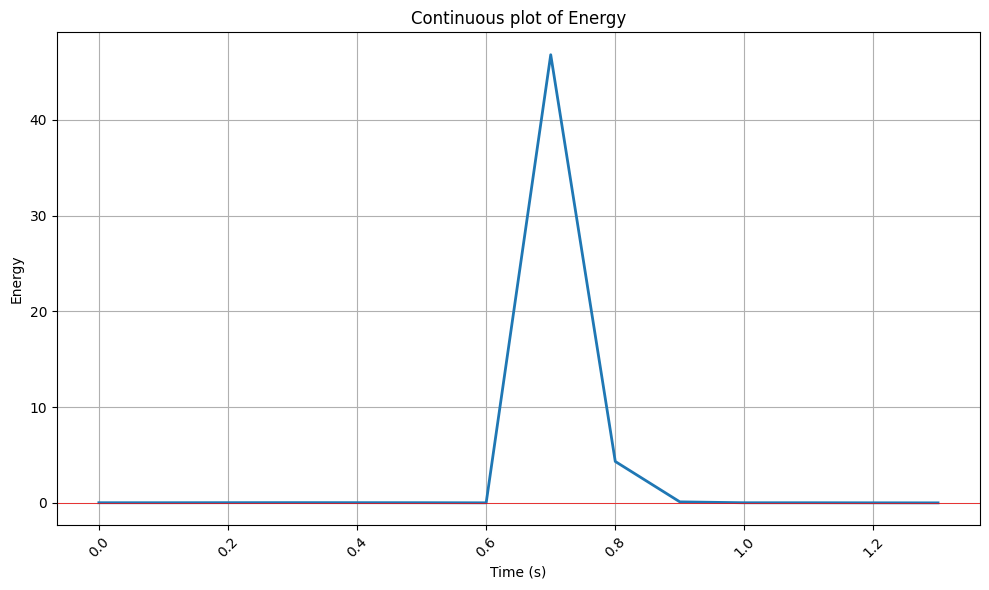

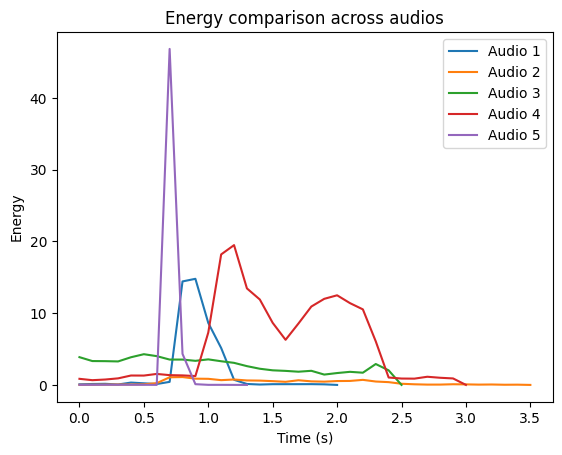

In [138]:

frame_length= int(0.1 * freq) # 100ms
print(f"Frame length: {frame_length} samples")

energy = []
energy_frames_all = []

# Energy for a 100ms frame
for audio in range(len(audios)):
    freq, datos = wavfile.read(audios[audio])
    datos = datos / 2 ** 15
    energy.append(np.sum(datos[:frame_length] ** 2))
    energy_frames=[]
    # Now we will calculate the energy for each signal by frames
    
    for frame in range(0, len(datos), frame_length):
        energy_frames.append(np.sum(datos[frame:frame + frame_length] ** 2))

     # Save the current audio's energy frames to the main list
    energy_frames_all.append(energy_frames)
    # Plot the enery for each audio
    continuous_time_plot(np.arange(len(energy_frames))*0.1, energy_frames, variable_name="Energy", xlabel="Time (s)")
    # Clear the energy_frames list
    
    
# Showing all the plots at the same time:
for index, energy_frames in enumerate(energy_frames_all):
    plt.plot(np.arange(len(energy_frames)) * 0.1, energy_frames, label=f"Audio {index + 1}")

plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.legend()
plt.title("Energy comparison across audios")
plt.show()    